# Modelling VO2 Max from Health and Sports Stats, gathered from Garmin Smartwatch via Garmin Connect API
[VO2 Max](https://en.wikipedia.org/wiki/VO2_max) can be an indicator of overall aerobic fitness level. Using the [Garmin Connect Python API](https://pypi.org/project/garminconnect/0.1.16/), gather relevant metrics, fit to regression model and inspect feature importance metrics using SHAP ([SHapley Additive exPlanations](https://christophm.github.io/interpretable-ml-book/shapley.html)) values. Here I track my Running VO2 Max over the past year, and investigate if there are any particular features that impact the VO2 Max score.

In [3]:
# pip install garminconnect
# pip install shap

In [4]:
from garminconnect import (
    Garmin,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
    GarminConnectAuthenticationError,
)

In [5]:
import datetime
from datetime import date
import calendar
import pandas as pd
from tqdm import tqdm
import plotly.graph_objects as go

YOUR_EMAIL = "lenka@otap.dk"
YOUR_PASSWORD = "*********"


"""
Initialize Garmin client with credentials
Only needed when your program is initialized
"""
try:
    client = Garmin(YOUR_EMAIL, YOUR_PASSWORD)
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client init: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client init")
    quit()



In [6]:

"""
Login to Garmin Connect portal
Only needed at start of your program
The libary will try to relogin when session expires
"""
try:
    client.login()
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client login: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client login")
    quit()





In [7]:
"""
Get full name from profile
"""
try:
    print(client.get_full_name())
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get full name: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get full name")
    quit()


Lenka Otap


# Gather year's data for Heart Rate, Sleep, Stress:

In [9]:
def get_dates_for_year(year):
    print(month)
    num_days = calendar.monthrange(year, month)[1]
    print(num_days)
    days = [datetime.date(year, month, day) for day in range(1, num_days+1)]
    print(days)
    return days

timeline = []

# 2021: Jan - dec
for month in range(1,13):
    months = get_dates_for_year(2021)
    timeline.append(months)

# 2022: Jan - dec
for month in range(1,13):
    months = get_dates_for_year(2022)
    timeline.append(months)

# 2023: Jan - dec 
for month in range(1,13):
    months = get_dates_for_year(2022)
    timeline.append(months)


1
31
[datetime.date(2021, 1, 1), datetime.date(2021, 1, 2), datetime.date(2021, 1, 3), datetime.date(2021, 1, 4), datetime.date(2021, 1, 5), datetime.date(2021, 1, 6), datetime.date(2021, 1, 7), datetime.date(2021, 1, 8), datetime.date(2021, 1, 9), datetime.date(2021, 1, 10), datetime.date(2021, 1, 11), datetime.date(2021, 1, 12), datetime.date(2021, 1, 13), datetime.date(2021, 1, 14), datetime.date(2021, 1, 15), datetime.date(2021, 1, 16), datetime.date(2021, 1, 17), datetime.date(2021, 1, 18), datetime.date(2021, 1, 19), datetime.date(2021, 1, 20), datetime.date(2021, 1, 21), datetime.date(2021, 1, 22), datetime.date(2021, 1, 23), datetime.date(2021, 1, 24), datetime.date(2021, 1, 25), datetime.date(2021, 1, 26), datetime.date(2021, 1, 27), datetime.date(2021, 1, 28), datetime.date(2021, 1, 29), datetime.date(2021, 1, 30), datetime.date(2021, 1, 31)]
2
28
[datetime.date(2021, 2, 1), datetime.date(2021, 2, 2), datetime.date(2021, 2, 3), datetime.date(2021, 2, 4), datetime.date(2021, 2

In [10]:
timeline

[[datetime.date(2021, 1, 1),
  datetime.date(2021, 1, 2),
  datetime.date(2021, 1, 3),
  datetime.date(2021, 1, 4),
  datetime.date(2021, 1, 5),
  datetime.date(2021, 1, 6),
  datetime.date(2021, 1, 7),
  datetime.date(2021, 1, 8),
  datetime.date(2021, 1, 9),
  datetime.date(2021, 1, 10),
  datetime.date(2021, 1, 11),
  datetime.date(2021, 1, 12),
  datetime.date(2021, 1, 13),
  datetime.date(2021, 1, 14),
  datetime.date(2021, 1, 15),
  datetime.date(2021, 1, 16),
  datetime.date(2021, 1, 17),
  datetime.date(2021, 1, 18),
  datetime.date(2021, 1, 19),
  datetime.date(2021, 1, 20),
  datetime.date(2021, 1, 21),
  datetime.date(2021, 1, 22),
  datetime.date(2021, 1, 23),
  datetime.date(2021, 1, 24),
  datetime.date(2021, 1, 25),
  datetime.date(2021, 1, 26),
  datetime.date(2021, 1, 27),
  datetime.date(2021, 1, 28),
  datetime.date(2021, 1, 29),
  datetime.date(2021, 1, 30),
  datetime.date(2021, 1, 31)],
 [datetime.date(2021, 2, 1),
  datetime.date(2021, 2, 2),
  datetime.date(2021

In [11]:
date_col = []
resting_HR_col = []
stress_col = []
sleep_col = []

for month in tqdm(timeline):
    #print(month)
    for day in month:
        date_col.append(day.isoformat())
        data = client.get_stats_and_body(day.isoformat())
        resting_HR = data.get("restingHeartRate")
        resting_HR_col.append(resting_HR)
        average_stress = data.get("averageStressLevel")
        stress_col.append(average_stress)
        sleeping_secs = data.get("sleepingSeconds")
                  
        try:
            sleeping_hours = sleeping_secs/3600
            if sleeping_hours > 2:        # require at least 2 continuous hours recorded to be deemed valid sleep
                sleep_col.append(sleeping_hours)
            else:
                sleep_col.append(None)
        except:                           # exception to handle future dates that haven't had sleep recorded yet
            sleep_col.append(None)
            continue

dict_ = {'Date': date_col, 'resting_HR': resting_HR_col, 'average_stress': stress_col, 'sleeping_hours': sleep_col}
df = pd.DataFrame(data=dict_)

100%|███████████████████████████████████████████████████████████████████| 36/36 [11:26<00:00, 19.06s/it]


In [12]:
df.head(400)

,Date,resting_HR,average_stress,sleeping_hours
0,2021-01-01,60,38,8.566667
1,2021-01-02,61,25,6.916667
2,2021-01-03,59,19,7.666667
3,2021-01-04,60,27,7.183333
4,2021-01-05,62,24,7.566667
...,...,...,...,...
395,2022-01-31,61,40,2.183333
396,2022-02-01,67,55,6.450000
397,2022-02-02,68,44,6.100000
398,2022-02-03,69,27,6.900000


In [13]:
df.to_csv("year_stats.csv")

In [27]:
df = pd.read_csv("year_stats.csv")

# Gather data for all runs this year - run metrics such as VO2, kilometres per run, avg HR per run, run duration, run cadence:

In [15]:
"""
Get activities data
"""
try:
    print(client.get_activities(0,1)) # 0=start, 1=limit  For 1 day
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get activities: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get activities")
    quit()

[{'activityId': 15198911311, 'activityName': 'Svøm i pool', 'description': None, 'startTimeLocal': '2024-05-03 08:21:04', 'startTimeGMT': '2024-05-03 06:21:04', 'activityType': {'typeId': 27, 'typeKey': 'lap_swimming', 'parentTypeId': 26, 'isHidden': False, 'trimmable': False, 'restricted': False}, 'eventType': {'typeId': 9, 'typeKey': 'uncategorized', 'sortOrder': 10}, 'comments': None, 'parentId': None, 'distance': 1125.0, 'duration': 1900.633056640625, 'elapsedDuration': 1920.1280517578125, 'movingDuration': 1895.43798828125, 'elevationGain': None, 'elevationLoss': None, 'averageSpeed': 0.593999981880188, 'maxSpeed': 1.562999963760376, 'startLatitude': None, 'startLongitude': None, 'hasPolyline': False, 'hasImages': False, 'ownerId': 86607424, 'ownerDisplayName': '36148ba7-5f51-469f-a7c3-952ab7118075', 'ownerFullName': 'Lenka Otap', 'ownerProfileImageUrlSmall': 'https://s3.amazonaws.com/garmin-connect-prod/profile_images/3b5f080a-4262-4413-9369-8b362d035f8f-86607424.png', 'ownerProf

In [16]:
w = client.get_activities(0,1) # 0=start, 1=limit
for f in w:
    for i in f:
        print(i)

activityId
activityName
description
startTimeLocal
startTimeGMT
activityType
eventType
comments
parentId
distance
duration
elapsedDuration
movingDuration
elevationGain
elevationLoss
averageSpeed
maxSpeed
startLatitude
startLongitude
hasPolyline
hasImages
ownerId
ownerDisplayName
ownerFullName
ownerProfileImageUrlSmall
ownerProfileImageUrlMedium
ownerProfileImageUrlLarge
calories
bmrCalories
averageHR
maxHR
averageRunningCadenceInStepsPerMinute
maxRunningCadenceInStepsPerMinute
maxLapAvgRunCadence
averageBikingCadenceInRevPerMinute
maxBikingCadenceInRevPerMinute
averageSwimCadenceInStrokesPerMinute
maxSwimCadenceInStrokesPerMinute
averageSwolf
activeLengths
steps
conversationUuid
conversationPk
numberOfActivityLikes
numberOfActivityComments
likedByUser
commentedByUser
activityLikeDisplayNames
activityLikeFullNames
activityLikeProfileImageUrls
requestorRelationship
userRoles
privacy
userPro
courseId
poolLength
unitOfPoolLength
hasVideo
videoUrl
timeZoneId
beginTimestamp
sportTypeId
avgPo

In [63]:
vo2 =client.get_activities(0,2800)

import numpy as np
metrics = [[],[],[],[],[],[]]
for data in vo2:
    
    print('##############')
    
    vo2_reading = data.get("vO2MaxValue")
    event_type = data.get("activityType")
    date = data.get("startTimeGMT")[:10]
    kiloms = data.get("distance")
    av_HR_for_run = data.get("averageHR")
    if data.get("movingDuration") != None:
        time_to_complete_run = data.get("movingDuration")/60
    else:
        time_to_complete_run = 0
        
    cadence = data.get("averageRunningCadenceInStepsPerMinute")
    
    if event_type.get('typeKey') == 'running':
        print('lkj')
        print(vo2_reading)
        print(event_type)
        print(date)
        print(kiloms)
        print(f"av. run HR: {av_HR_for_run}")
        print(time_to_complete_run)
        #break
        metrics[0].append(vo2_reading)
        metrics[1].append(date)
        metrics[2].append(kiloms/1000)
        metrics[3].append(av_HR_for_run)
        metrics[4].append(time_to_complete_run)
        metrics[5].append(cadence)
        


##############
##############
lkj
50.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'isHidden': False, 'restricted': False, 'trimmable': True}
2024-05-02
8049.759765625
av. run HR: 140.0
49.33565012613932
##############
##############
##############
lkj
50.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'isHidden': False, 'restricted': False, 'trimmable': True}
2024-04-30
5869.5
av. run HR: 137.0
35.53663330078125
##############
##############
##############
lkj
49.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'isHidden': False, 'restricted': False, 'trimmable': True}
2024-04-28
6811.60009765625
av. run HR: 138.0
42.71688334147135
##############
##############
##############
##############
##############
##############
lkj
49.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'isHidden': False, 'restricted': False, 'trimmable': True}
2024-04-26
9135.26953125
av. run HR: 133.0
58.555599975585935
##############
##############
##############
#######

In [64]:
d = {'VO2': metrics[0], 'Date': metrics[1], 'Km': metrics[2], 'Av_HR_for_Run': metrics[3], 'run_time': metrics[4],
    'av_cadence': metrics[5]}
df2 = pd.DataFrame(data=d)
df2

,VO2,Date,Km,Av_HR_for_Run,run_time,av_cadence
0,50.0,2024-05-02,8.04976,140.0,49.335650,171.328125
1,50.0,2024-04-30,5.86950,137.0,35.536633,175.281250
2,49.0,2024-04-28,6.81160,138.0,42.716883,175.906250
3,49.0,2024-04-26,9.13527,133.0,58.555600,172.281250
4,50.0,2024-04-25,6.17404,136.0,40.406234,169.984375
...,...,...,...,...,...,...
992,49.0,2020-11-26,9.01783,138.0,57.006750,183.703125
993,49.0,2020-11-25,13.10173,142.0,80.325300,184.406250
994,49.0,2020-11-23,4.40349,137.0,26.999217,187.765625
995,49.0,2020-11-22,11.34087,133.0,74.884784,182.812500


In [71]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

filtered_df = df2[(df2['Date'] >= '2021-01-01') & (df2['Date'] <= '2023-12-31')]
filtered_df



,VO2,Date,Km,Av_HR_for_Run,run_time,av_cadence
73,49.0,2023-12-31,5.169500,143.0,31.602650,177.703125
74,49.0,2023-12-30,10.016410,143.0,62.381433,176.968750
75,49.0,2023-12-28,5.586540,137.0,35.262600,176.453125
76,49.0,2023-12-26,6.703520,139.0,43.179066,173.625000
77,48.0,2023-12-24,6.273850,140.0,41.013633,174.265625
...,...,...,...,...,...,...
960,48.0,2021-01-10,22.635590,139.0,147.957333,180.968750
961,48.0,2021-01-08,22.350359,139.0,148.059649,177.203125
962,48.0,2021-01-06,22.536199,138.0,150.343717,173.968750
963,49.0,2021-01-04,21.208920,137.0,140.120249,177.515625


### Join on date - common variable between run data and everyday data (sleep,hr and stress):

In [74]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

result = pd.merge(df,
                  df2,
                  on='Date',
                  how='left')

result

,Unnamed: 0,Date,resting_HR,average_stress,sleeping_hours,VO2,Km,Av_HR_for_Run,run_time,av_cadence
0,0,2021-01-01,60,38,8.566667,NaN,NaN,NaN,NaN,NaN
1,1,2021-01-02,61,25,6.916667,49.0,21.159131,142.0,128.673383,183.937500
2,2,2021-01-03,59,19,7.666667,NaN,NaN,NaN,NaN,NaN
3,3,2021-01-04,60,27,7.183333,49.0,21.208920,137.0,140.120249,177.515625
4,4,2021-01-05,62,24,7.566667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1153,1091,2022-12-28,62,30,8.016667,51.0,5.000050,169.0,22.643800,195.453125
1154,1091,2022-12-28,62,30,8.016667,NaN,1.248030,162.0,7.950000,164.843750
1155,1092,2022-12-29,59,24,6.650000,51.0,10.121920,135.0,63.092050,178.359375
1156,1093,2022-12-30,59,24,6.950000,51.0,15.774280,143.0,96.206667,168.453125


In [75]:
result['ind'] = result.index
result

,Unnamed: 0,Date,resting_HR,average_stress,sleeping_hours,VO2,Km,Av_HR_for_Run,run_time,av_cadence,ind
0,0,2021-01-01,60,38,8.566667,NaN,NaN,NaN,NaN,NaN,0
1,1,2021-01-02,61,25,6.916667,49.0,21.159131,142.0,128.673383,183.937500,1
2,2,2021-01-03,59,19,7.666667,NaN,NaN,NaN,NaN,NaN,2
3,3,2021-01-04,60,27,7.183333,49.0,21.208920,137.0,140.120249,177.515625,3
4,4,2021-01-05,62,24,7.566667,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
1153,1091,2022-12-28,62,30,8.016667,51.0,5.000050,169.0,22.643800,195.453125,1153
1154,1091,2022-12-28,62,30,8.016667,NaN,1.248030,162.0,7.950000,164.843750,1154
1155,1092,2022-12-29,59,24,6.650000,51.0,10.121920,135.0,63.092050,178.359375,1155
1156,1093,2022-12-30,59,24,6.950000,51.0,15.774280,143.0,96.206667,168.453125,1156


# Fit model to calculate Shapely Feature importance:

In [139]:
ml = result.dropna(subset=['VO2'])
import xgboost as xgb
from sklearn.model_selection import train_test_split
# ml # 963 rows with runs, sleeping hours, average stress, resting HR, avg_HR_for_run, run_time, av_cadence

# We want to try to predict the VO2max by given x-parameters using XGBoost algorithm, training on 80% of data
y = ml['VO2']
X = ml[['resting_HR','average_stress', 'Km','Av_HR_for_Run','run_time', 'sleeping_hours','av_cadence',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)
model = xgb.XGBRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [140]:
# Average magnitude of the error in prediction ... about 0.52-0.63 ... 0.55 for seed 42 (random_state)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.5470390517476926

[0.09936167 0.12307583 0.14311549 0.20203234 0.15436436 0.12673406
 0.15131624]


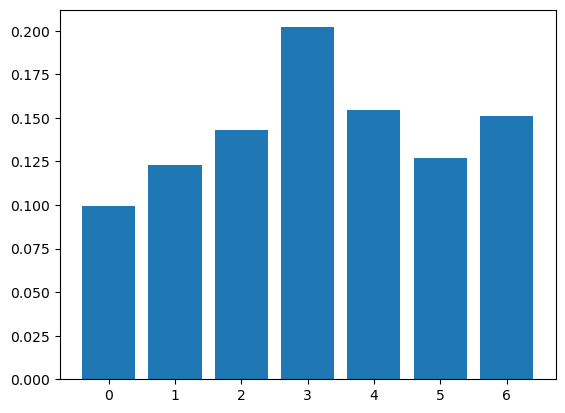

In [141]:
import matplotlib.pyplot as plt
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

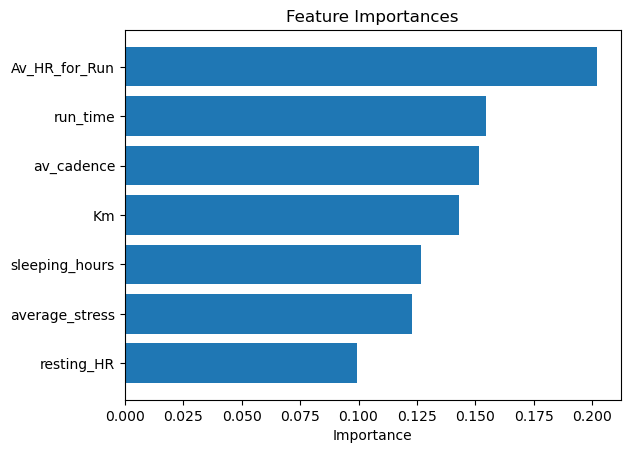

In [142]:
# Assuming your DataFrame X has columns named correctly as per your features:
feature_names = X.columns

# Feature importances from the model
importances = model.feature_importances_

# Sorting importances and corresponding names
sorted_indices = importances.argsort()
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Creating a bar chart
plt.barh(sorted_features, sorted_importances)  # horizontal bar chart for better readability
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [143]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [144]:
shap.force_plot(explainer.expected_value, shap_values[10], features=X_test.iloc[10], feature_names=X_test.columns)

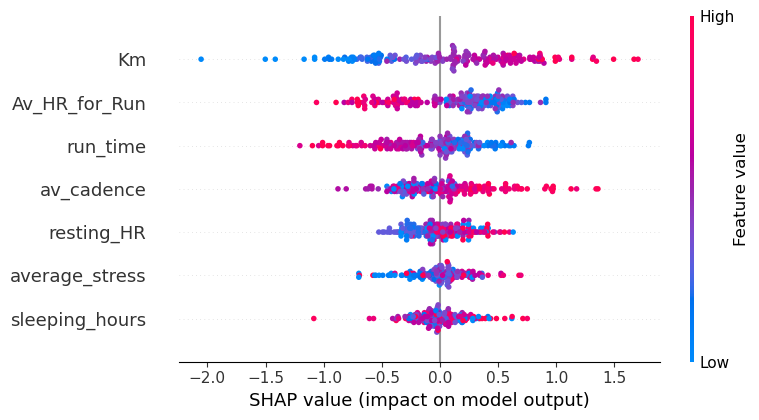

In [145]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

#shap.summary_plot(shap_values, X_train)

### Reading the results:

* Km:
The feature 'Km' shows both positive and negative SHAP values, meaning it can either increase or decrease the model's prediction depending on its value. High values (red dots) tend to increase the prediction, suggesting a positive correlation with the target variable, likely indicating better performance or higher activity levels as the kilometers increase.

* Av_HR_for_Run:
This feature predominantly shows positive impacts (right of zero), particularly for higher values (red), suggesting that higher average heart rates during runs generally contribute to an increase in the model's output.

* run_time:
Similar to 'Av_HR_for_Run', with a mixture of impacts but a trend where higher values (red) often lead to positive adjustments in the prediction, potentially indicating that longer runs might predict higher performance or endurance metrics.

* av_cadence:
Displays a mix of effects. Higher cadences (red) appear to mostly decrease the model's prediction (dots to the left), which might suggest that in the context of your model, higher cadence isn't necessarily beneficial or might be linked to less efficient running forms or shorter strides.

* resting_HR:
Mostly positioned to the left with a mixture of red and blue dots, indicating that both high and low resting heart rates can reduce the prediction. This might imply a non-linear relationship where extreme values on either side are undesirable.

* average_stress:
Features a cluster of red dots primarily to the right, suggesting that higher stress levels are positively correlated with the target. This might be counterintuitive unless in the context of performance sports where some stress levels might be indicative of competitive readiness.

* sleeping_hours:
Primarily blue dots to the right, indicating that more hours of sleep tend to increase the model's prediction, supporting a view that good rest is beneficial for the predicted outcome.


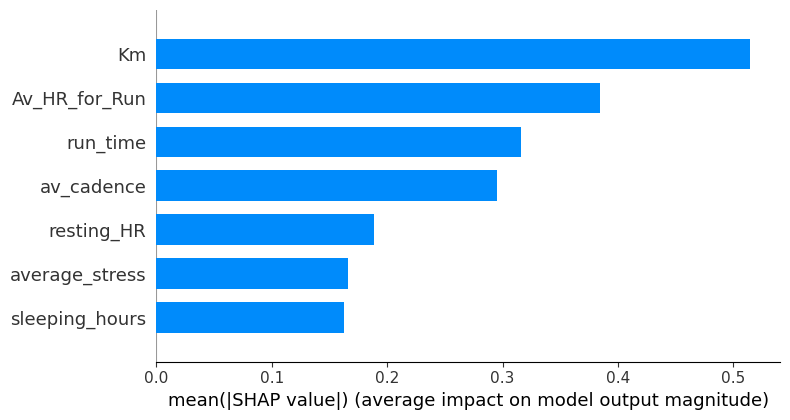

In [146]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

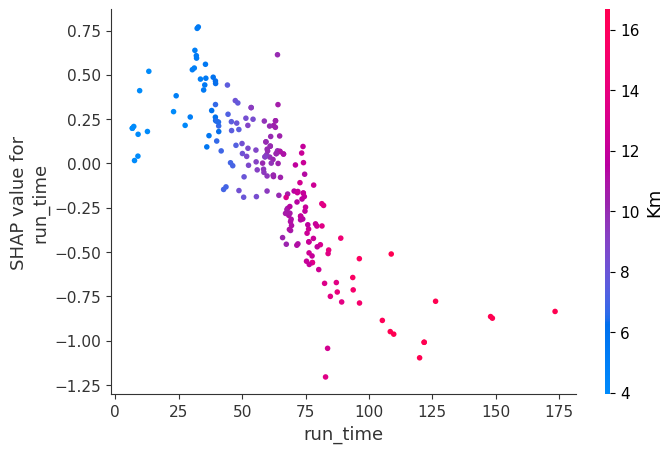

In [147]:
shap.dependence_plot("run_time", shap_values, X_test)

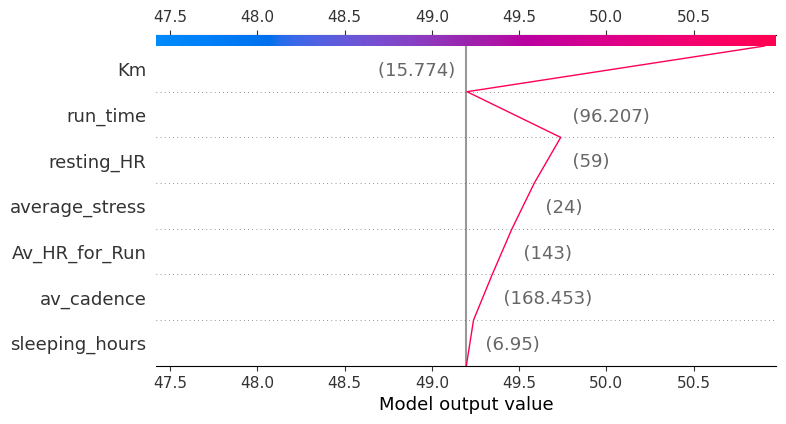

In [148]:
shap.decision_plot(explainer.expected_value, shap_values[3], X_test.iloc[3])#, matplotlib=True)  

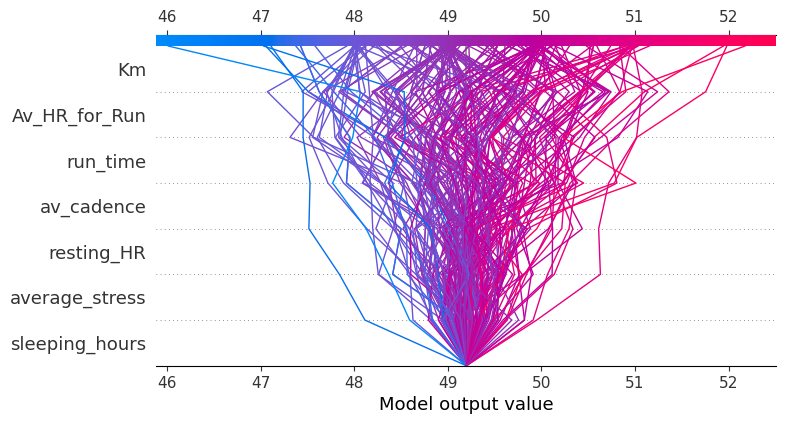

In [149]:
shap.decision_plot(explainer.expected_value, shap_values, X_test)#, matplotlib=True)

In [150]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

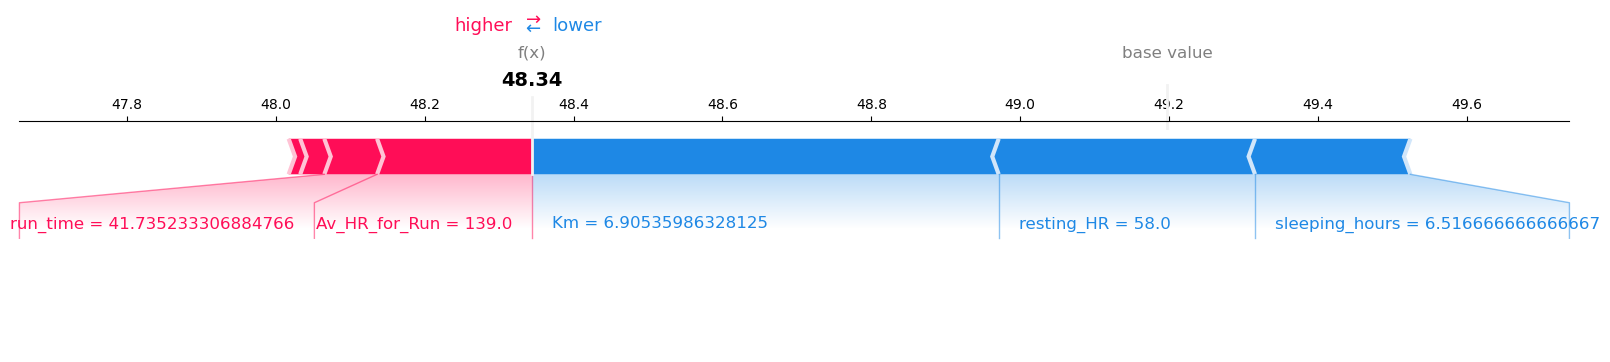

In [151]:
shap.force_plot(explainer.expected_value, shap_values[8], X_test.iloc[8], matplotlib=True)

In [152]:
y_test

1131    51.0
311     52.0
752     52.0
1156    51.0
319     51.0
        ... 
1057    50.0
25      48.0
331     50.0
250     49.0
1044    49.0
Name: VO2, Length: 193, dtype: float64

In [153]:
pred

array([50.55597 , 50.004604, 51.944702, 50.905926, 50.14857 , 49.08357 ,
       48.015224, 49.088917, 48.344097, 51.00923 , 48.795753, 48.057144,
       49.927902, 49.920547, 49.023674, 49.007175, 49.49324 , 50.001637,
       48.81884 , 48.655582, 49.93478 , 48.99127 , 49.920773, 50.518642,
       50.11441 , 48.035183, 50.967514, 49.224426, 49.92425 , 50.154915,
       48.81884 , 47.425674, 48.50574 , 49.004215, 49.01376 , 49.22301 ,
       49.93647 , 50.8367  , 48.00832 , 48.990356, 48.986042, 48.684692,
       49.610386, 48.263184, 48.98438 , 49.01457 , 49.999725, 49.02264 ,
       49.999214, 49.05203 , 49.95578 , 49.083954, 49.01419 , 48.002434,
       48.979744, 47.052635, 49.709103, 50.007526, 48.009117, 49.928635,
       49.002674, 49.22525 , 49.45936 , 49.07127 , 48.2364  , 48.025642,
       48.18453 , 48.00099 , 48.991276, 49.664925, 49.52575 , 50.892315,
       49.01656 , 50.93467 , 49.75214 , 48.919163, 48.045994, 50.537403,
       48.21268 , 50.55597 , 49.650597, 48.98468 , 

# Plot data to observe insights:

In [156]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['Av_HR_for_Run']/3,
                    mode='lines+markers',
                    text=result['Av_HR_for_Run'],
                    connectgaps=True,
                    name='Av_HR_for_Run'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))


fig.add_trace(go.Scatter(x=result['Date'], y=result['sleeping_hours'],
                    mode='lines', name='sleeping_hours', connectgaps=True))
        
fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2 Max',connectgaps=True))

fig.update_layout(title='Health metrics over time',
                   xaxis_title='Date',
                   yaxis_title='Health Features')

fig.show()

In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['Av_HR_for_Run']/3,
                    mode='lines+markers',
                    text=result['Av_HR_for_Run'],
                    connectgaps=True,
                    name='Av_HR_for_Run'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))


fig.add_trace(go.Scatter(x=result['Date'], y=result['sleeping_hours'],
                    mode='lines', name='sleeping_hours', connectgaps=True))
        
fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2 Max',connectgaps=True))

fig.update_layout(title='Health metrics over time - Zoomed in to change from 54 -> 55',
                   xaxis_title='Date',
                   yaxis_title='Health Features')

fig.show()

### Plot other features:

In [163]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['resting_HR'],
                    mode='lines',
                    name='resting_HR'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))
fig.add_trace(go.Bar(
            x=result['Date'], y=result['run_time'],
            text=result['run_time'],
            textposition='auto',
            name='run_time_mins'
        ))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['Km']*6,
            text=result['Km'],
            textposition='auto',
            name='Km'
))

fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2_Max'))


fig.show()

In [37]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['resting_HR'],
                    mode='lines',
                    name='resting_HR'))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['run_time'],
            text=result['run_time'],
            textposition='auto',
            name='run_time'
        ))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['Km']*6,
            text=result['Km'],
            textposition='auto',
            name='distance_Km'
))

fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='markers', name='VO2_Max'))

fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines',
                    name='stress'))

fig.show()